# Análise de Dados das Missões Espaciais Desde 1957 🚀


---


##🖋️ Nomes: André Ribeiro Thasmo
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Igor José Miranda Azevedo de Paiva
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Matheus Duarte de Souza

## ☄️ Introdução

BATATA cotam dados de todos os lançamentos  espaciais de 1957 à 2020 obtido no site Kaggle, analisamos relações de custos, quantidade de lançamentos, porcentagem de sucesso e falha entre outros. A análise foi feita utilizando a biblioteca pandas para operações no dataframe, matplotlib e seaborn para representação gráfica dos resultados obtidos e math e numpy para tratamento matemático. Todas as passagens deste caderno foram explicadas dentro e fora das linhas de código visando uma melhor compreensão.

## 🎥 Link para o Vídeo

[BCC- Space Missions (Powtoon)][link_video]
### 📚 Dados sobre o Banco de Dados

O banco de dados foi obtido no site [Kaggle][linkkaggle], e realizado o upload no [repositório][linkProjetoGithub] do projeto no Github.

Dentre seu conteúdo, decorre:                  


*   Company Name: Nome da Compania Aeroespacial
*   Location: Local de Lançamento
*   Datum: Data e hora de Lançamento
*   Detail: Nome da Aeronave
*   Status Rocket: Status da Aeronave
*   Rocket: Custo da Missão em Milhões de Dólares
*   Status Mission: Status da Missão


### ⛓ Fontes

> [🚀 All Space Missions From 1957][linkkaggle]  
> [📥 Data Base (upload pelo GitHub)][linkDataBase]  
> [<img align="left" alt=" Link Repositório Projeto" width="20px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/github.svg"/> Repositório do Projeto][linkProjetoGitHub]  
> [🐼 Documentação Pandas][linkPandas]


[linkkaggle]: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957
[linkDataBase]: https://raw.githubusercontent.com/AndreThasmo/Data-Analysis-on-Space-Missions/main/Space_Corrected.csv?token=AL7MMZULGDZCUMDLMDY3WZTBRFRB2
[linkProjetoGitHub]: https://github.com/AndreThasmo/Data-Analysis-on-Space-Missions
[linkPandas]: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
[link_video]: https://www.powtoon.com/ws/b5qMgQ7mMTg/1/m





De início, devemos importas as bibliotecas que serão utilizadas no decorrer da análise.

In [1]:
import pandas as pd                # Para análise de DataBases
import matplotlib.pyplot as plt    # Para gerar gráficos
import math                        # Para operações matemáticas
import numpy as np                 # Para realizar cálculos e relações matemáticas 
import seaborn as sns              # Para uma fácil customização dos gráficos
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

Importar o database, remover algumas colunas que não serão utilizadas e apresentar os primeiros elementos para ver aspectos de dados e formatação.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AndreThasmo/Data-Analysis-on-Space-Missions/main/Space_Corrected.csv?token=AL7MMZULGDZCUMDLMDY3WZTBRFRB2")
df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1)                # Remove colunas de indexação desnecessárias
df.head(3)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


Tendo em vista a formatação do atributo Datum (relativo as datas e horas) para melhor manipulação dos dados, iremos separar em hora, data e ano:

In [ ]:
df["Date"] = pd.to_datetime(df["Datum"])                          # Converte a coluna Datum em um objeto "datetime" para realizar as manipulações
df['Hour'] = df['Date'].apply(lambda datetime: datetime.hour)     # A partir da nova coluna gerada, cria-se uma função lambda para filtrar somente o elemento das horas
df["Date"] = df["Date"].apply(lambda datetime: datetime.date())   # De maneira análoga, realiza-se o processo pra extrair a data
df["Year"] = df["Date"].apply(lambda datetime: datetime.year)     # e o ano
df.head(3)


,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Date,Hour,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07,5,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06,4,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04,23,2020


*** ***
Primeiramente iremos analisar a quantidade de lançamento de foguetes por cada companhia durante o período registrado no DataBase. Para isso iremos criar um novo data frame contendo a quantidade de lançamentos por cada companhia e filtraremos somente as companhias com mais de 10 lançamentos.

In [ ]:
unique_companies = len(df["Company Name"].unique())                                                              # Obtem a quantidade de companhias únicas do DataFrame
print(' Número de companhias registradas: {}\n  '.format(unique_companies))                                      # e exibe este valor  

launch_per_company = df["Company Name"].value_counts().reset_index()[:56]                                        # Gera um novo DataSet com a quantidade de lançamentos de cada companhia em ordem decrescente
launch_per_company.rename(columns = {'index': 'Company Name', 'Company Name': 'Launches'}, inplace = True)       # Renomea-se o nome das colunas para corresponder corretamente após a alteração                       

launch_per_company_g10 = launch_per_company.query("Launches >= 10")                                              # Realiza um querry no DataSet para filtrar as companhias com número de lançamento maior que 10
unique_companies_g10 = len(launch_per_company_g10["Company Name"].unique())                                      # Obtem a quantidade de companhias com número de lançamento maior que 10
print(' Número de companhias com mais de 10 lançamentos: {}'.format(unique_companies_g10))                       # e exibe este valor
                                                         
print('\n\n Lançamentos por Companhia:\n')                                                                       # Gera um título pra tabela ficar bonitinha
print(launch_per_company_g10)                                                                                    # e a exibe

 Número de companhias registradas: 56
  
 Número de companhias com mais de 10 lançamentos: 28


 Lançamentos por Companhia:

        Company Name  Launches
0          RVSN USSR      1777
1        Arianespace       279
2               CASC       251
3   General Dynamics       251
4               NASA       203
5             VKS RF       201
6       US Air Force       161
7                ULA       140
8             Boeing       136
9    Martin Marietta       114
10            SpaceX       100
11               MHI        84
12          Northrop        83
13          Lockheed        79
14              ISRO        76
15         Roscosmos        55
16               ILS        46
17        Sea Launch        36
18              ISAS        30
19         Kosmotras        22
20           US Navy        17
21          Eurockot        13
22               ESA        13
23        Rocket Lab        13
24               ISA        13
25       Blue Origin        12
26               IAI        11
27     

E agora, a partir dos dados da tabela, geramos o gráfico:

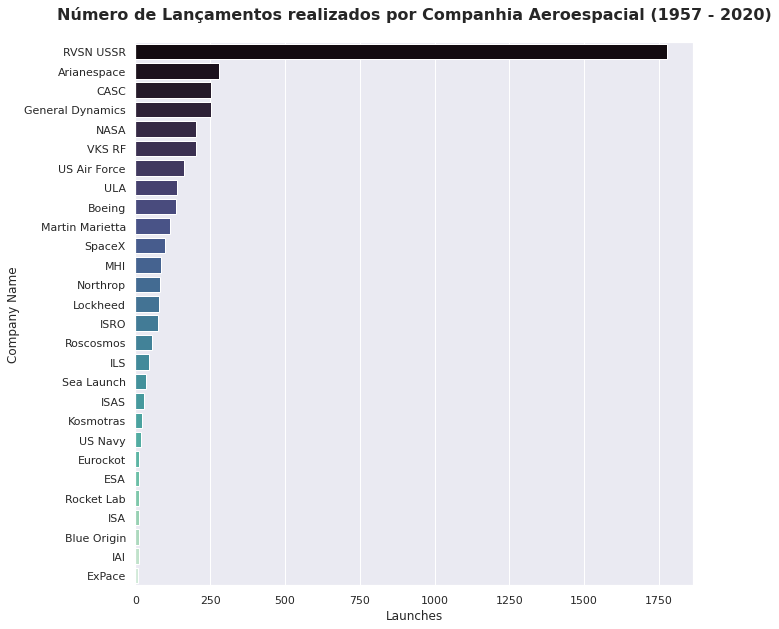

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})   # Aumenta o tamanho da figura para aparecer todos os nomes das companhias
sns.barplot(x = launch_per_company_g10['Launches'], y = launch_per_company_g10['Company Name'], palette="mako").set_title('Número de Lançamentos realizados por Companhia Aeroespacial (1957 - 2020)',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, y = 1.03) # Faz o plot, deixa bonito e coloca o título em negrito e fonte maior
plt.show()                # só pra tirar aqueles dados gerados pela matplotlib


*** ***
Agora, analiza-se os dados de lançamento em relação ao dinheiro investido, para compreender a distribuição monetária das companhias. Devido a algumas companhias não divulgarem seus gastos, o dataSet não tem todos os valores, logo, essa análise será baseada em dados existentes.

In [ ]:
df_rockets_valued = df.dropna(subset = [" Rocket"], axis= "rows")                                                                # Cria um novo dataFrame somente com os foguetes que contém orçamento
df_rockets_valued.loc[:, ' Rocket'] = df_rockets_valued.loc[:, " Rocket"].fillna(0.0).str.replace(",", "")                       # Ajusta a formatação dos valores que estão salvos em uma string, removendo as vírgulas
df_rockets_valued.loc[:, " Rocket"] = df_rockets_valued.loc[:, " Rocket"].astype(np.float64).fillna(0.0)                         # Transforma os valores que estão salvos em string para float

unique_companies_valued = len(df_rockets_valued["Company Name"].unique())                                                        # Obtem a quantidade de companhias únicas do DataFrame
print(' Número de companhias registradas com valores de lançamento: {}\n  '.format(unique_companies_valued))                     # e exibe o valor

launch_per_company_valued = df_rockets_valued["Company Name"].value_counts().reset_index()[:25]                                  # Cria um novo dataSet somente com o número de lançamento correspondente a cada companhia
launch_per_company_valued.rename(columns = {'index': 'Company Name', 'Company Name': 'Launches'}, inplace = True)                # Renomea o nome das colunas
launch_per_company_valued = launch_per_company_valued.sort_values(by="Company Name").reset_index().drop(["index"], axis = 1)     # Reordena e deleta a coluna de index

df_money = df_rockets_valued.groupby(["Company Name"])[" Rocket"].sum().reset_index()                                            # Cria um novo dataSet, reagrupa por ano de lançamento e realiza a soma do custo por companhia de todos os lançamentos
df_money['Launches'] = launch_per_company_valued['Launches']                                                                     # Junta ambos dataSets em um único
#df_money = df_money.sort_values(by = [" Rocket"], ascending = False)                                                            # Ordena as companhias por maior gasto em lançamentos (comentei porque o gráfico fica mais bonito com uma certa aleatoriedade :)
print(df_money)                                                                                                                  # Exibe essa linda tabela

 Número de companhias registradas com valores de lançamento: 25
  
       Company Name    Rocket  Launches
0       Arianespace  16345.00        96
1            Boeing   1241.00         7
2              CASC   6340.26       158
3               EER     20.00         1
4               ESA     37.00         1
5          Eurockot    543.40        13
6            ExPace     28.30         1
7               ILS   1320.00        13
8              ISRO   2177.00        67
9              JAXA    168.00         3
10        Kosmotras    638.00        22
11         Lockheed    280.00         8
12              MHI   3532.50        37
13  Martin Marietta    721.40         9
14             NASA  76280.00       149
15         Northrop   3930.00        83
16        RVSN USSR  10000.00         2
17       Rocket Lab     97.50        13
18        Roscosmos   1187.50        23
19           Sandia     15.00         1
20           SpaceX   5444.00        99
21              ULA  14798.00        98
22     US Air

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


A partir da tabela com os dados tratados, gera-se o gráfico do investimento total de cada companhia em lançamentos.

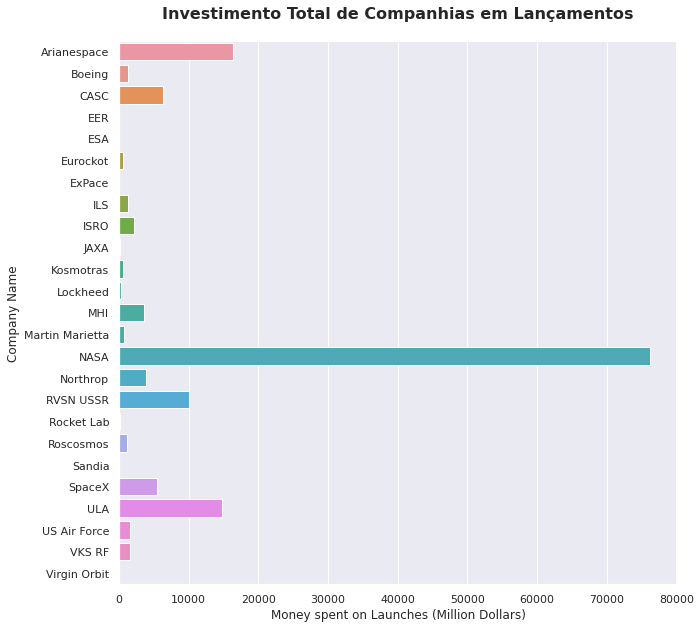

In [ ]:
sns.barplot(x = df_money[' Rocket'], y = df_money['Company Name']).set_xlabel('Money spent on Launches (Million Dollars)') # Faz o plot e altera o título do eixo x para facilitar a interpretação

plt.title('Investimento Total de Companhias em Lançamentos',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, y = 1.03)    # Adiciona um título

plt.show()

A partir desta análise, estima-se que possa ocorrer uma correlação entre o número de lançamentos e o dinheiro gasto por companhia, logo, gera-se o gráfico de correlação e o seu respectivo coeficiente.

O coeficiente de correlação é de 0.6258828409704442


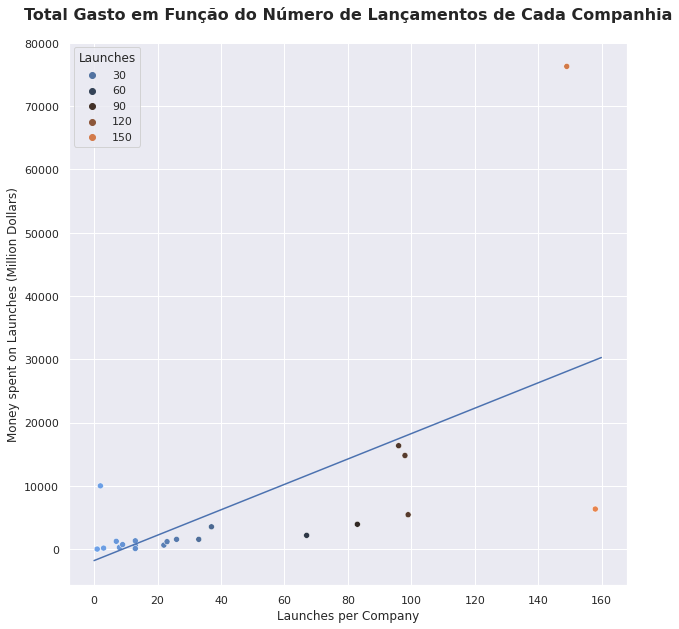

In [ ]:
palettita = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)     # Gera uma paleta de cores para melhor interpretação do gráfico
sns.scatterplot(data = df_money, x = df_money['Launches'], y = df_money[' Rocket'], hue = 'Launches',
                palette = palettita).set(ylabel = 'Money spent on Launches (Million Dollars)', xlabel = 'Launches per Company')
# Gera o gráfico, ajusta a paleta de cores e troca os nomes dos eixos

plt.title('Total Gasto em Função do Número de Lançamentos de Cada Companhia',fontdict= { 'fontsize': 16, 'fontweight':'bold'}, y = 1.03)       # Cria um título em negrito e maior (deslocado .03 para cima)



(a, b) = np.polyfit(x = df_money['Launches'], y = df_money[' Rocket'], deg = 1)  # Estabelece os coeficientes para uma função de primeiro grau com base na correlação dos dados
correlation = df_money['Launches'].corr(df_money[' Rocket'])                     # Calcula o coeficiente de correlação 
print("O coeficiente de correlação é de {}".format(correlation))                 # e o exibe

x = np.arange(0, 160, 0.1)                        # Cria um array que varia no eixo x para montar a reta
y = a*x + b                                       # calcula a projeção em y da função utilizando esse array acima

plt.plot(x, y, '-')                               # Gera essa reta azul

plt.show()                                        # eu já expliquei o que isso faz (kkkkk)


Diferente do esperado, a relação entre o número de foguetes lançados e o custo, nem sempre segue uma sequência linear, devido a empresas como a Nasa na qual o orçamento excede 70 bilhões.

*** *** 
Com base no dataSet, é curioso saber quantos foguetes ainda estão no espaço e quantos já foram desativados, logo, trata-se os dados:

In [ ]:
dataStatus = df["Status Rocket"].value_counts().reset_index()                   # Cria um novo dataSet com a soma das ocorrencia dos status de cada foguete
dataStatus.rename(columns = {'index': 'Status Rocket', 'Status Rocket': 'Number of Occurrences'}, inplace = True)     # Renomea as colunas (não sei porque o reset_index atrapalha as colunas ~help~)

statusRocket = dataStatus['Number of Occurrences']                                      # Separa os valores em um novo dataSet para facilitar as operações
dataStatus["Relative Percentage"] = {statusRocket[0]/dataStatus['Number of Occurrences'].sum()*100,
                                     (statusRocket[1]/dataStatus['Number of Occurrences'].sum()*100)} # Calcula as porcentagens relativas

print(dataStatus) # Exibe essa tabela:

   Status Rocket  Number of Occurrences  Relative Percentage
0  StatusRetired                   3534             81.72988
1   StatusActive                    790             18.27012


E a partir da tabela, gera-se o gráfico:

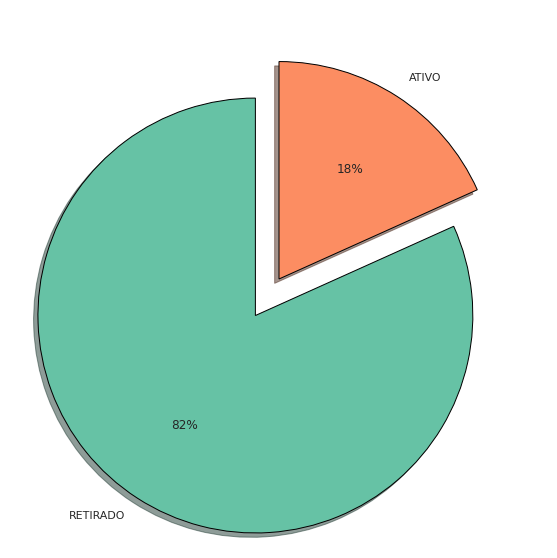

In [ ]:
fig = plt.figure()
labels = ['RETIRADO', 'ATIVO']             # Atribui nome aos pedaços da pizza 
colors = sns.color_palette("Set2")[0:2]    # Gera uma paleta de cores para ser utilizada
explode = (0.2, 0)                         # Propriedade responsável por separar o gráfico e gerar destaque

sns.set(rc={'figure.figsize':(5,5)})   # Ajusta o tamanho da figura para melhor visualização
plt.pie(dataStatus["Relative Percentage"], labels = labels, colors = colors, startangle=90,  wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True) # Gera o gráfico e o exibe
plt.show()


fig.savefig('pizza1.png',transparent= True, dpi=fig.dpi)


*** ***
Outra análise possível seria em relação ao sucesso e falha de cada missão, portanto, filtra-se esses dados e calcula a taxa de Sucesso:

In [ ]:
data_launch = df["Status Mission"].value_counts().reset_index()                                                  # Obtem a soma de todos os status de missões
data_launch.rename(columns = {'index': 'Status Mission', 'Status Mission': 'Status Launch'}, inplace = True)     # Renomea as colunas

status_launch = data_launch["Status Launch"]
data_launch["Sucess Rate"] = {status_launch[0]/data_launch["Status Launch"].sum()*100,
                             (status_launch[1]/data_launch["Status Launch"].sum()*100),
                             (status_launch[2]/data_launch["Status Launch"].sum()*100),
                             (status_launch[3]/data_launch["Status Launch"].sum()*100)}                          # Calcula a taxa de sucesso de lançamento

print(data_launch)                                                                                               # e exibe a tabela



      Status Mission  Status Launch  Sucess Rate
0            Success           3879     0.092507
1            Failure            339    89.708603
2    Partial Failure            102     2.358927
3  Prelaunch Failure              4     7.839963


E exibe o seu gráfico:

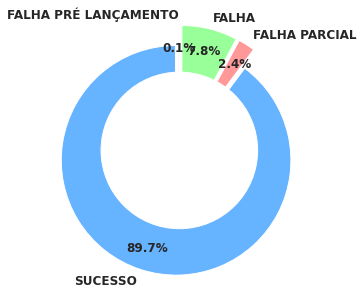

In [ ]:
fig = plt.figure()

labels = ['FALHA PRÉ LANÇAMENTO', 'SUCESSO', 'FALHA PARCIAL', 'FALHA']       # Atribui nome aos pedaços da pizza (parte 2)
colors = ['#000000','#66b3ff','#ff9999','#99ff99']                           # Cores em hexadecimal porque não achei uma paleta de cores que ficasse bom

sns.set(rc={'figure.figsize':(6,6)})                                         # Ajusta o tamanho da figura
explode = (0.1, 0.1, 0.1, 0.1)                                               # # Propriedade responsável por separar o gráfico e gerar destaque


plt.pie(data_launch["Sucess Rate"],labels=labels,textprops={ 'fontsize': 12, 'fontweight':'bold'}, explode=explode, startangle=90, autopct='%1.1f%%', pctdistance=0.8, colors = colors, radius=1.1)
centre_circle = plt.Circle((0,0),0.750,fc='white')                           # Cria um objeto gráfico em formato de círculo, branco com raio proporcional ao gráfico de pizza (chamado de plt mesmo)
fig = plt.gcf()                                                              # Pega figura gerada                                               
fig.gca().add_artist(centre_circle)                                          # Implementa o círculo em sobreposição
plt.tight_layout()                                                           # Ajusta automaticamente o layout
plt.show()                                                                   # Até aqui você já sabe o que isso faz

fig.savefig('pizza2.png',transparent= True, dpi=fig.dpi)

# EU NÃO GOSTEI DESSE GRÁFICO

*** ***
Agora, iremos plotar o gráfico da chance de sucesso do lançamento x custo do foguete. Inicialmente usarei este gráfico para comparar os lançamentos totais e os lancaçamentos bem sucedidos, manualmente para cada empresa. Por exemplo temos o query da NASA

In [ ]:
print(df.query("`Company Name`== 'NASA'").count())
print(df.query("`Company Name`== 'NASA' and `Status Mission`=='Success'").count())

Company Name      203
Location          203
Datum             203
Detail            203
Status Rocket     203
 Rocket           149
Status Mission    203
Date              203
Hour              203
Year              203
dtype: int64
Company Name      186
Location          186
Datum             186
Detail            186
Status Rocket     186
 Rocket           146
Status Mission    186
Date              186
Hour              186
Year              186
dtype: int64


Agora vamos comparar os valores pelo valor total gasto na companhia dividido pelo número de lançamentos

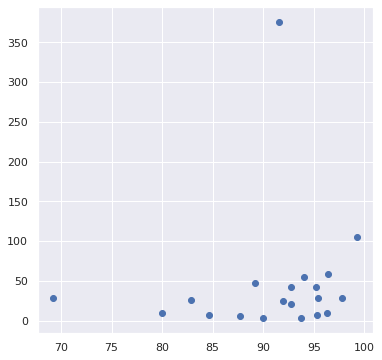

In [ ]:
x = [69.2,80,82.9,84.6,87.7,89.2,90,91.6,92,92.7,92.7,93.7,94,95.2,95.3,95.4,96.3,96.4,97.8,99.3]
y = [28.45,9.63,26.64,7.5,6.33,47.35,2.83,375.76,25.26,41.8,21.59,3.54,54.44,42.03,7.7,29,9.13,58.68,28.7,105.7]
plt.plot(x,y,'o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d6a5f1310>]],
      dtype=object)

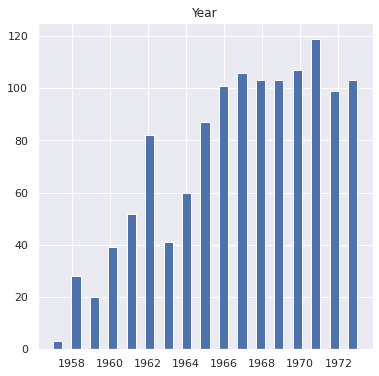

In [ ]:
dfsrush=df.query("Year<1974")
dfsrush.hist(column="Year", bins= 33)